In [1]:
from jazzTheory.base import Note, Chord, Mode, Scale, Progression, plotNotes
from matplotlib.pyplot import *
from matplotlib import gridspec
import pandas as pd

The primary goal of this package is to help in the analysis of a chord progression and facilitate learning of jazz standards
For example, we can enter a progression as a string, ask to analyse then plot the results
each cell shows the chord, its degree in the corresponding scale, and optionally the coresponding notes

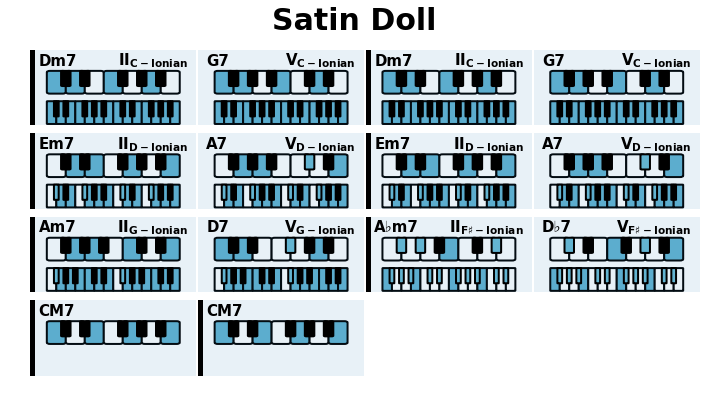

In [2]:
prg = Progression('|Dm7,G7|Dm7,G7|Em7,A7|Em7,A7|Am7,D7|Abm7,Db7|CM7|CM7|',name='Satin Doll')
prg.analyze() 
prg.plot()

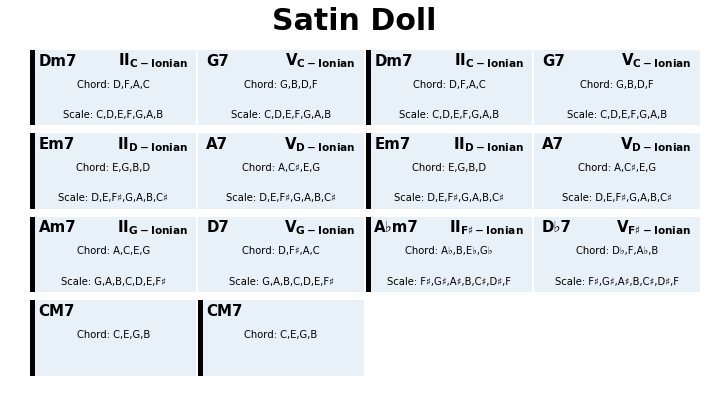

In [3]:
prg.plot(plotScale=False, plotChord=False)

# Notes
Notes can be defined as Note('Cb'), Note('D#######') with unicode characters b,♭,#,♯

We can add an additional alteration Note('D',+4)

In [4]:
print(Note('Db'))
print(Note('Db')+3)
print('Nb half-steps between F and C: '+str(Note('F')-Note('C')))

D♭
E
Nb half-steps between F and C: 5


# Chords
Chords can be defined as Chord('Cmb5') or Chord('C', 'G', 'Eb'])

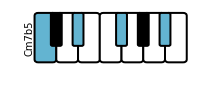

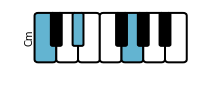

In [5]:
Chord('Cm7b5').plot()
Chord(['C', 'G', 'Eb']).plot()

### Notes, guide tones and avoid notes:

In [6]:
print('Notes in Cm7b5:')
print(str(Chord('Cm7b5').notes(asStr=True))+'\n') # asStr is used to get strings instead of Note instances

print('Guide Tones in Cm7b5:')
print(str(Chord('Cm7b5').guideTones(asStr=True))+'\n')

print('Avoid Notes in Cm7b5 when in C Dorian:')
print(str(Chord('Cm7b5').avoidNotes('C# dorian',asStr=True))+'\n')

Notes in Cm7b5:
['C', 'E♭', 'G♭', 'B♭']

Guide Tones in Cm7b5:
['E♭', 'B♭']

Avoid Notes in Cm7b5 when in C Dorian:
['C♯', 'E', 'B']



### Intervals

In [7]:
print('Intervals in Eb7: '+str(Chord('Eb7').intervals()))
print('As strings: '+'-'.join(Chord('Eb7').intervals(asStr=True)))

Intervals in Eb7: [0, 4, 7, 10]
As strings: 1-3-5-b7


### Scales on which a given chord can be found (with scale degree)

In [13]:
for ch in Chord('F7').listScales():
    print('{} {:12} {}'.format(ch[0], ch[1], ch[2]))

C Dorian       IV
D Phrygian     III
D♯ Lydian       II
F Mixolydian   I
G Aeolian      VII
A Locrian      VI
A♯ Ionian       V


# Scales

In [ ]:
print('Chords in Eb Ionian')
print(Scale('Eb', 'Ionian').chords())

print('\nDoes Eb Ionian have Cm7? (returns the scale degree)')
print(Scale('Eb', 'Ionian').hasChord(Chord('Cm7')))

print('\nPlot C Dorian')
Scale('C dorian').plot()

### Relative minor of a scale

In [ ]:
print('D Ionian relative minor:')
Scale('D', 'Ionian').relativeMinor()

# Modes

### Print all chords from C modes

In [ ]:
key = 'C'
lst = {}
for mode in Mode.modesLst:
    if mode is not 'Chromatic':
        C = Scale(key, mode).chords()
        lst[key + ' ' + mode] = [str(C[c].root) + C[c].type for c in C]
print(pd.DataFrame(lst, index=Scale.chordsDegrees).T)

# Other Examples:

# Plot all chords in a given key

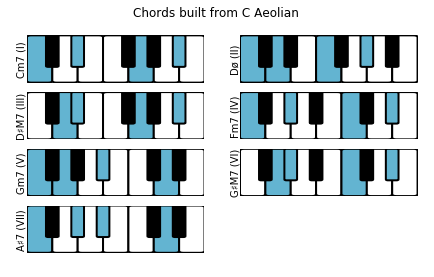

In [9]:
s = Scale('C minor')
s.plotChords()

# Plot Xm7 in all keys

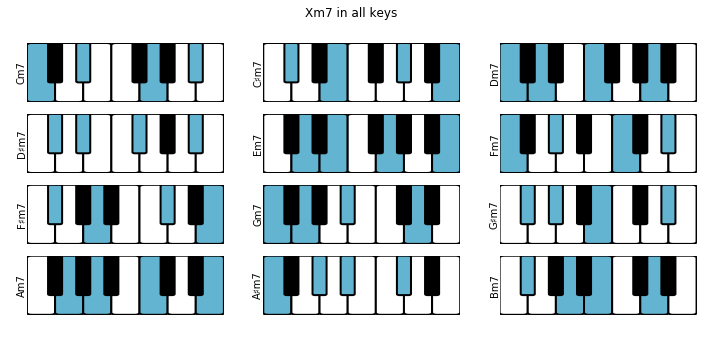

In [10]:
fig = figure(figsize=(12, 5))
grid = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)
for i, n in enumerate(Note.chrSharp):
    ax = fig.add_subplot(grid[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    plotNotes(Chord(str(n) + 'm7').notes(), pos=[0, 0, 100, 60], name=str(n) + 'm7',ax=ax)
    axis('off')
suptitle('Xm7 in all keys')

# Plot every implemented chord types in from a given root

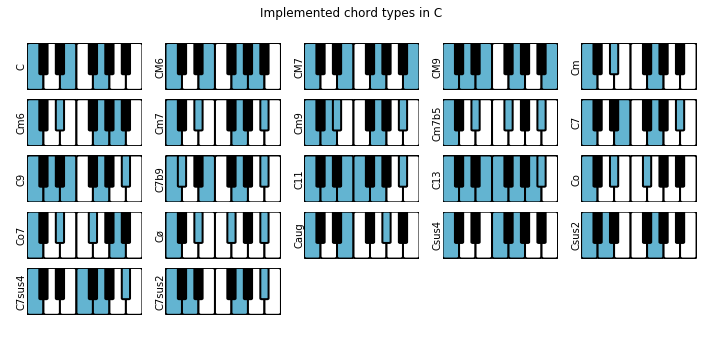

In [11]:
root = 'C'
fig = figure(figsize=(12, 5))
grid = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)
for i, n in enumerate(Chord.typesLst):
    ax = fig.add_subplot(grid[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    plotNotes(Chord(root + n).notes(), pos=[0, 0, 100, 60], name=root + str(n),ax=ax)
    axis('off')
suptitle('Implemented chord types in ' + root)